# Klassifikation mit Zahlen: Ziffernerkennung (Digits-Datensatz)

In diesem Notebook schauen wir uns ein **klassisches Klassifikationsbeispiel** an:

- Eingabedaten: handgeschriebene Ziffern (0–9) als **8×8 Pixel-Bild**
- Zielvariable: die **Ziffer (0–9)** – also eine **Klassifikation mit Nummern**
- Ziel: Ein Modell trainieren, das zu einem Bild sagt: *„Das ist eine 3“*, *„Das ist eine 7“* usw.

Wir verwenden dazu eine Python Library `scikit-learn` und den eingebauten **Digits-Datensatz**.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

## 1. Datensatz laden

Wir laden den `digits`-Datensatz aus `sklearn`.  
Jedes Beispiel besteht aus:

- einem **8×8 Bild** (64 Pixel)
- einem **Label** (Zahl von 0 bis 9)


In [2]:
digits = load_digits()

X = digits.data      # Form: (n_samples, 64)
y = digits.target    # Form: (n_samples,)

print("Anzahl Beispiele:", X.shape[0])
print("Dimension eines Beispiels:", X.shape[1])
print("Mögliche Klassen (Zahlen):", np.unique(y))

Anzahl Beispiele: 1797
Dimension eines Beispiels: 64
Mögliche Klassen (Zahlen): [0 1 2 3 4 5 6 7 8 9]


## 2. Beispielbilder und zugehörige Klassen (Nummern)

Wir schauen uns ein paar Bilder mit ihrem **Klassenlabel (0–9)** an.


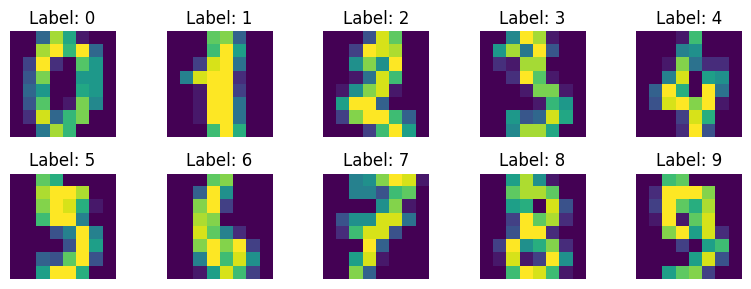

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(digits.images[i], interpolation='nearest')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 3. Das Modell trainieren

Wir verwenden ein **multinomiales logistisches Regressionsmodell**.
Das Modell lernt, für jedes Bild eine Wahrscheinlichkeit für jede Ziffer (0–9) zu berechnen und wählt die Ziffer mit der höchsten Wahrscheinlichkeit.

Vorsicht: Der Modellname enthält "Regression", aber das ist eigentlich eine **Klassifikationsaufgabe**!

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning

# Daten aufteilen: 80% Trainieren, 20% Testen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ignoriere Warnung betreffend Konvergenz des Modells
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)

    # Modell trainieren mit einem Durchgang (Iteration)
    model = LogisticRegression(max_iter=1, solver='lbfgs')
    model.fit(X_train, y_train)

# Genauigkeit berechnen
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Modell wurde trainiert.")

Modell wurde trainiert.


## 4. Erste Vorhersagen testen

Als erstes testen wir, wie gut das Modell die Trainings-Bilder vorhersagt:

In [5]:
for i in range(5):
    print("Wahr:", y[i], "→ Modell sagt:", model.predict([X[i]])[0])

Wahr: 0 → Modell sagt: 0
Wahr: 1 → Modell sagt: 1
Wahr: 2 → Modell sagt: 1
Wahr: 3 → Modell sagt: 3
Wahr: 4 → Modell sagt: 1


## 5. Interaktiv: Erkunde Ziffern

Wähle mit dem Schieberegler eine Ziffer und schau dir an:
- Wie das **echte Bild** aussieht
- Welche **Zahl es wirklich ist**
- Was das **Modell vorhersagt**
- Die **Wahrscheinlichkeiten** für alle Ziffern (0–9)
- Grüne Balken = richtige Antwort, rote Balken = falsche Vorhersage, blaue Balken = andere Ziffern

In [6]:
import ipywidgets as widgets
from ipywidgets import interact

%matplotlib inline

def zeige_ziffer(index=0):
    # Bild anzeigen
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Linke Seite: Das Bild
    ax1.imshow(digits.images[index], cmap='gray', interpolation='nearest')
    ax1.set_title(f'Bild Nr. {index}', fontsize=14, fontweight='bold')
    ax1.axis('off')
    
    # Vorhersage
    vorhersage = model.predict([X[index]])[0]
    wahrscheinlichkeiten = model.predict_proba([X[index]])[0]
    
    # Rechte Seite: Wahrscheinlichkeiten als Balkendiagramm
    ziffern = np.arange(10)
    colors = ['green' if i == y[index] else ('red' if i == vorhersage else 'lightblue') for i in ziffern]
    
    bars = ax2.bar(ziffern, wahrscheinlichkeiten, color=colors, edgecolor='black', linewidth=1.5)
    ax2.set_xlabel('Ziffer', fontsize=12)
    ax2.set_ylabel('Wahrscheinlichkeit', fontsize=12)
    ax2.set_title('Modell-Wahrscheinlichkeiten', fontsize=14, fontweight='bold')
    ax2.set_xticks(ziffern)
    ax2.set_ylim(0, 1)
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Text-Ausgabe
    print(f'\n📊 Beispiel Nr. {index}')
    print(f'✓ Echte Ziffer: {y[index]}')
    print(f'🤖 Modell sagt: {vorhersage}')
    if y[index] == vorhersage:
        print(f'✅ RICHTIG!')
    else:
        print(f'❌ FALSCH')
    print(f'\nWahrscheinlichkeiten:')
    for ziffer in range(10):
        prob = wahrscheinlichkeiten[ziffer]
        balken = '|' * int(prob * 40)
        print(f'  {ziffer}: {prob*100:5.1f}% {balken}')

interact(
    zeige_ziffer,
    index=widgets.IntSlider(value=0, min=0, max=len(X)-1, step=1, description='Beispiel Nr.:', style={'description_width': 'initial'})
);

interactive(children=(IntSlider(value=0, description='Beispiel Nr.:', max=1796, style=SliderStyle(description_…

## 6. Verständnisfragen

**Beantworte diese Fragen schriftlich:**

1. **Eingabedaten**: 
   - Wie viele Pixel hat jedes Bild? 
   - Wie sind diese 64 Werte strukturiert? (Tipp: schaue Abschnitt 1)

2. **Klassifikation vs. Regression**:
   - Was ist der Unterschied zwischen Klassifikation (diese Aufgabe) und Regression (lineare Regression)?
   - Gib zwei Beispiele für Klassifikation und zwei für Regression.

3. **Das Modell**:
   - Warum verwenden wir "logistische" Regression und nicht "lineare" Regression für Ziffern (0–9)?
   - Das Modell gibt Wahrscheinlichkeiten aus (z.B. 95% für Ziffer 3). Wie entscheidet es sich dann für eine Ziffer?

4. **Fehler beobachten**: 
   - Nutze den interaktiven Schieberegler (Abschnitt 5) und finde **mindestens ein Beispiel, wo das Modell falsch liegt**.
   - Schreibe auf: Welche Beispiel-Nummer? Welche Ziffer war es wirklich? Was hat das Modell vorhergesagt?
   - Warum könnte das Modell hier einen Fehler gemacht haben?

5. **Wahrscheinlichkeiten verstehen**:
   - Schau dir im interaktiven Plot die Balken an.
   - Warum hat die richtige Ziffer meist den höchsten Balken?
   - Was sagen die blauen Balken aus?

6. **Genauigkeit testen**:
   - Schau dir mindestens 10 verschiedene Beispiele an.
   - Wie oft hatte das Modell recht, wie oft falsch?
   - Schätze: Wie gut ist das Modell? (z.B. 90%, 95%, 85%?)

7. **Warum Fehler?** Welche Ziffern verwechselt das Modell häufiger? (z.B. 8 und 0, oder 3 und 5?)

8. **Experiment: Iterationen erhöhen**:
   - Ändere in Abschnitt 3 die Zeile `max_iter=1` zu `max_iter=2` oder noch höher.
   - Führe Abschnitt 3 wieder aus.
   - **Frage:** Wird die Test-Genauigkeit besser? Ab wann gibt es keine Verbesserung mehr?